## Task:

Create a **Graph** where you pass in a single list of integers along with a name and an operation. If the operation is a `+`, you **add**  the elements and if it is a `*`, you  **multiply** the elements, **all within the same node**

**Input** : `{"name" : "Amitabh Jain", "values" : [1,2,3,4], "operation" : "*"}` 

**Output** : `"Hi Amitabh Jain, your answer is: 24"`

In [1]:
from typing import TypedDict, List
from operator import mul
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    """State schwma that accepts name string, values array and a operator to perform that action"""

    name: str
    values: List[int]
    operator: str
    output : str

In [3]:
def perform_operation(state: AgentState) -> AgentState:
    """Perform the operation on the values based on the operator"""
    if state['operator'] == '+':
        result = sum(state['values'])
        state['output'] = f"Hi {state['name']}, your answer is {result}."
    elif state['operator'] == '*':
        result = 1
        for value in state['values']:
            result = mul(result, value)
        state['output'] = f"Hi {state['name']}, your answer is {result}."
    else:
        raise ValueError(f"Unknown operator: {state['operator']}")
    
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("perform_operation", perform_operation)
graph.set_entry_point("perform_operation")
graph.set_finish_point("perform_operation")

app = graph.compile()

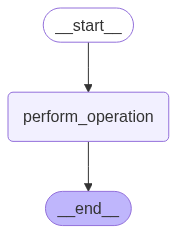

In [5]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({
    "name" : "Amitabh Jain",
    "values": [1, 2, 3, 4],
    "operator": "*"
})


In [ ]:
result["output"]

'Hi Amitabh Jain, your answer is 24.'